<a href="https://colab.research.google.com/github/tejasvi11/PYTHON-PROJECTS/blob/main/covid19analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [11]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_data(in).csv to covid_19_data(in) (1).csv


In [12]:
df = pd.read_csv('covid_19_data(in).csv')

In [13]:
df.drop(['SNo', 'Last Update'], axis=1, inplace=True)
df.rename(columns={'ObservationDate': 'date', 'Province/State': 'state',
                   'Country/Region': 'country'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])

In [14]:
imputer = SimpleImputer(strategy='constant')
df[df.columns] = imputer.fit_transform(df)

In [15]:
df_country = df.groupby(['date', 'country'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [16]:
imputer = SimpleImputer(strategy='constant')
df[df.columns] = imputer.fit_transform(df)

In [17]:
df_country = df.groupby(['date', 'country'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [18]:
df_global = df_country.groupby('date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [19]:
def plot_country_trends(df, countries, max_countries=5):
    for country in countries[:max_countries]:
        country_data = df[df['country'] == country]
        if country_data['Confirmed'].sum() == 0:
            continue  # skip countries with no data

        plt.figure(figsize=(10, 5))
        plt.plot(country_data['date'], country_data['Confirmed'], color='blue', label='Confirmed')
        plt.plot(country_data['date'], country_data['Recovered'], color='green', label='Recovered')
        plt.plot(country_data['date'], country_data['Deaths'], color='red', label='Deaths')
        plt.title(f'COVID-19 Trends: {country}')
        plt.xlabel('Date')
        plt.ylabel('Number of Cases')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [20]:
unique_countries = df_country['country'].unique()

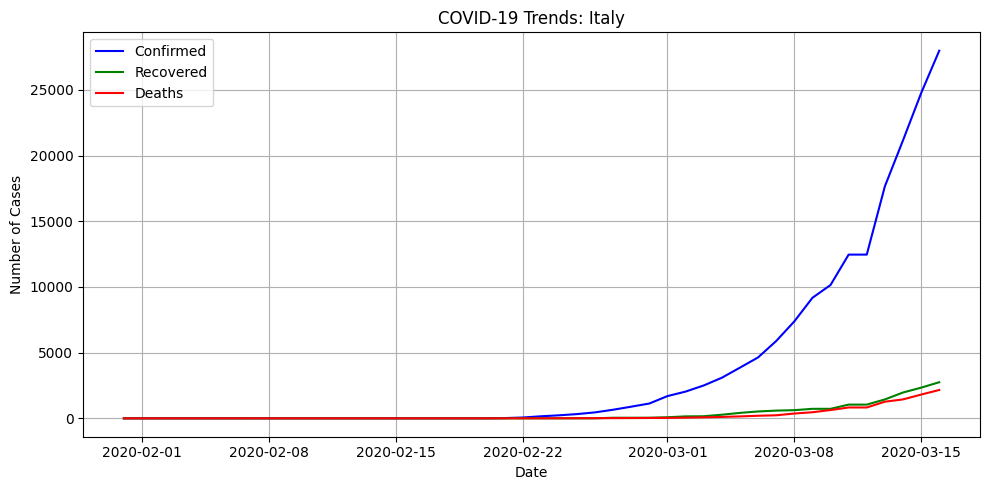

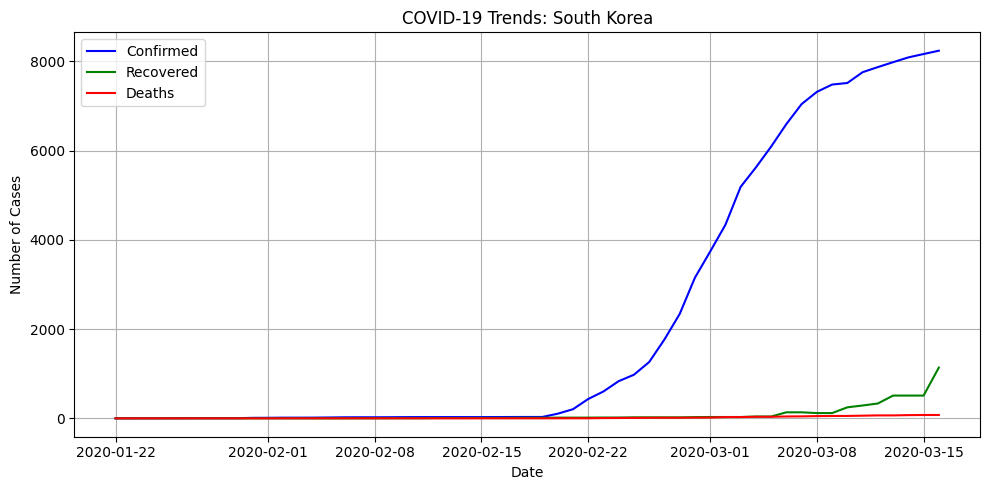

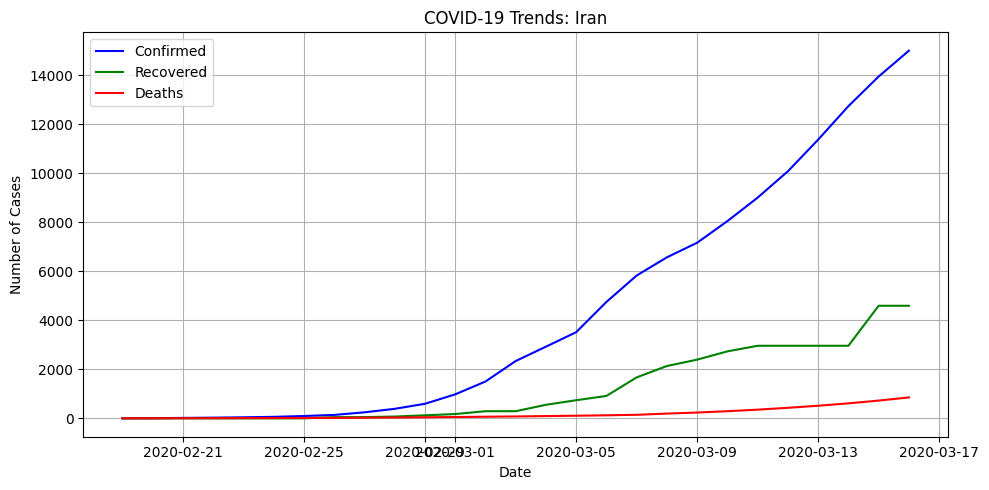

In [21]:
top_countries = df_country.groupby('country')['Confirmed'].sum().sort_values(ascending=False).head(10).index.tolist()

plot_country_trends(df_country, top_countries)

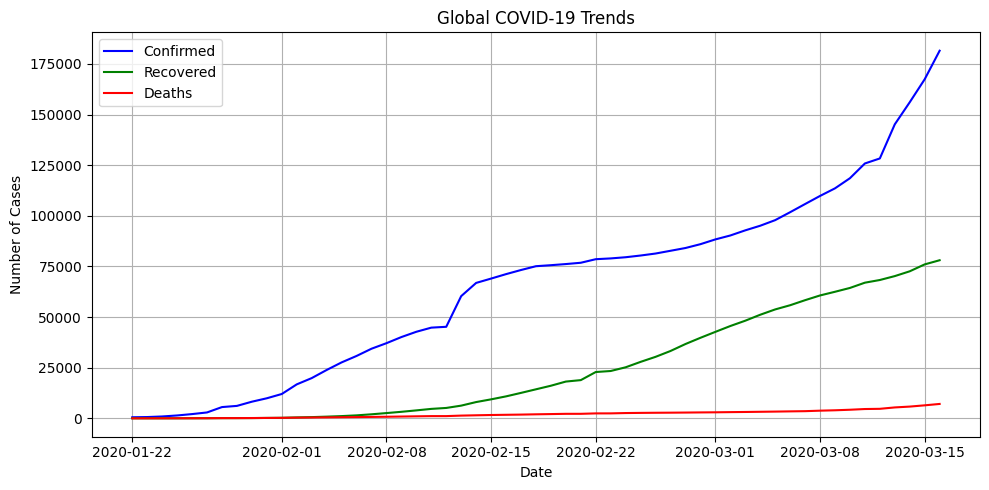

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(df_global['date'], df_global['Confirmed'], color='blue', label='Confirmed')
plt.plot(df_global['date'], df_global['Recovered'], color='green', label='Recovered')
plt.plot(df_global['date'], df_global['Deaths'], color='red', label='Deaths')
plt.title('Global COVID-19 Trends')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()